# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

# Input


In [2]:
DataType = "Iris"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
PassiveLearningRF = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", "_PL0.0")
RandomForesResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", 0.0)
AnalyzedData005 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.005)
AnalyzedData010 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.01)
AnalyzedData015 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.015)
AnalyzedData020 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.02)
AnalyzedData025 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.025)
AnalyzedData030 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.030)
AnalyzedData035 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.035)
AnalyzedData040 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.04)


# Shape

In [3]:
ShapeTable = {"DUREAL":[AnalyzedData005["Error_DUREAL"].shape[0],
                        AnalyzedData010["Error_DUREAL"].shape[0],
                        AnalyzedData015["Error_DUREAL"].shape[0],
                        AnalyzedData020["Error_DUREAL"].shape[0],
                        AnalyzedData025["Error_DUREAL"].shape[0],
                        AnalyzedData030["Error_DUREAL"].shape[0],
                        AnalyzedData035["Error_DUREAL"].shape[0],
                        AnalyzedData040["Error_DUREAL"].shape[0]],
              "UNREAL": [AnalyzedData005["Error_UNREAL"].shape[0],
                         AnalyzedData010["Error_UNREAL"].shape[0],
                         AnalyzedData015["Error_UNREAL"].shape[0],
                         AnalyzedData020["Error_UNREAL"].shape[0], 
                         AnalyzedData025["Error_UNREAL"].shape[0], 
                         AnalyzedData030["Error_UNREAL"].shape[0], 
                         AnalyzedData035["Error_UNREAL"].shape[0], 
                         AnalyzedData040["Error_UNREAL"].shape[0]]}
ShapeTable = pd.DataFrame(ShapeTable)
ShapeTable.index = range(5,45,5)
ShapeTable.index = ShapeTable.index/100
ShapeTable

,DUREAL,UNREAL
0.05,100,100
0.10,100,99
0.15,100,100
0.20,100,100
0.25,100,100
0.30,100,100
0.35,100,100
0.40,100,100


# Run Time

In [4]:
TimeTable = {
    "DUREAL Mean":[str(round(np.mean(AnalyzedData005["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData010["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData015["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData020["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData025["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData030["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData035["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData040["Time_DUREAL"])/60,2))],
              "UNREAL Mean": [str(round(np.mean(AnalyzedData005["Time_UNREAL"])/60,2)),
                         str(round(np.mean(AnalyzedData010["Time_UNREAL"])/60,2)),
                         str(round(np.mean(AnalyzedData015["Time_UNREAL"])/60,2)),
                         str(round(np.mean(AnalyzedData020["Time_UNREAL"])/60,2)),
                         str(round(np.mean(AnalyzedData025["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData030["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData035["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData040["Time_UNREAL"])/60,2))],
                "DUREAL max":[str(round(np.max(AnalyzedData005["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData010["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData015["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData020["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData025["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData030["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData035["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData040["Time_DUREAL"])/60,2))],
              "UNREAL max": [str(round(np.max(AnalyzedData005["Time_UNREAL"])/60,2)),
                         str(round(np.max(AnalyzedData010["Time_UNREAL"])/60,2)),
                         str(round(np.max(AnalyzedData015["Time_UNREAL"])/60,2)),
                         str(round(np.max(AnalyzedData020["Time_UNREAL"])/60,2)),
                         str(round(np.max(AnalyzedData025["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData030["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData035["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData040["Time_UNREAL"])/60,2))]
                         }
TimeTable = pd.DataFrame(TimeTable)
TimeTable.index = range(5,45,5)
TimeTable.index = TimeTable.index/100
TimeTable

,DUREAL Mean,UNREAL Mean,DUREAL max,UNREAL max
0.05,0.16,0.16,0.32,0.32
0.10,0.25,0.25,0.54,0.56
0.15,0.41,0.4,1.25,1.31
0.20,1.69,1.71,4.88,4.69
0.25,3.23,3.26,14.69,13.06
0.30,20.24,20.15,60.53,73.14
0.35,28.65,28.04,112.22,129.87
0.40,133.58,135.75,403.02,425.54


# Error Vec

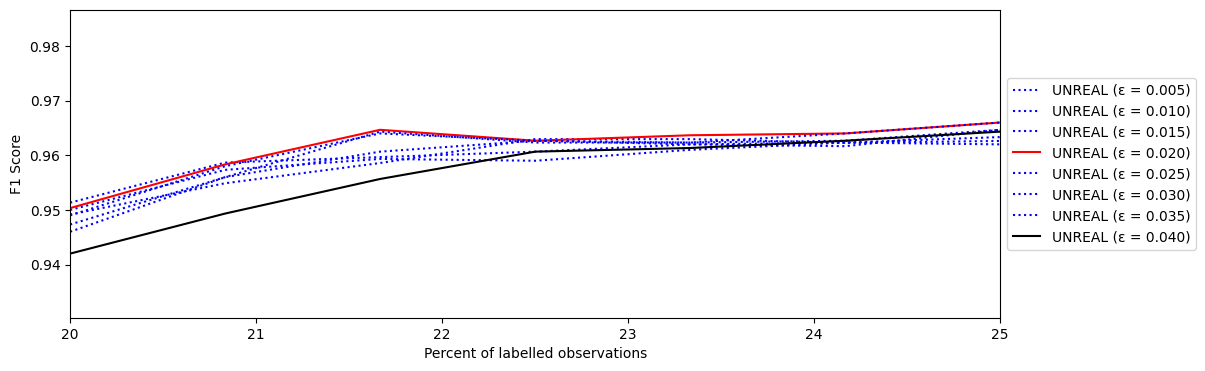

In [13]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData015['Error_DUREAL'].shape[0]}"
colors = {
    "PassiveLearning": "black",
    "RandomForest": "green",
    "DUREAL005" : "orange", 
    "UNREAL005" : "blue", 
    "DUREAL010" : "orange", 
    "UNREAL010" : "blue", 
    "DUREAL015" : "orange", 
    "UNREAL015" : "blue", 
    "DUREAL020" : "orange", 
    "UNREAL020" : "red", 
    "DUREAL025" : "orange", 
    "UNREAL025" : "blue", 
    "DUREAL030" : "orange", 
    "UNREAL030" : "blue", 
    "DUREAL035" : "orange", 
    "UNREAL035" : "blue",
    "DUREAL040" : "orange", 
    "UNREAL040" : "black"
}

linestyles = {
    "PassiveLearning": "solid",
    "RandomForest": "solid",
    "DUREAL020": "solid",
    "UNREAL020": "solid",
    "DUREAL040": "solid",
    "UNREAL040": "solid"
}

LegendMapping = {
    "DUREAL005": "DUREAL (ε = 0.005)",
    "UNREAL005": "UNREAL (ε = 0.005)",
    "DUREAL010": "DUREAL (ε = 0.010)",
    "UNREAL010": "UNREAL (ε = 0.010)",
    "DUREAL015": "DUREAL (ε = 0.015)",
    "UNREAL015": "UNREAL (ε = 0.015)",
    "DUREAL020": "DUREAL (ε = 0.020)",
    "UNREAL020": "UNREAL (ε = 0.020)",
    "DUREAL025": "DUREAL (ε = 0.025)",
    "UNREAL025": "UNREAL (ε = 0.025)",
    "DUREAL030": "DUREAL (ε = 0.030)",
    "UNREAL030": "UNREAL (ε = 0.030)",
    "DUREAL035": "DUREAL (ε = 0.035)",
    "UNREAL035": "UNREAL (ε = 0.035)",
    "DUREAL040": "DUREAL (ε = 0.040)",
    "UNREAL040": "UNREAL (ε = 0.040)",
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                #  PassiveLearning = PassiveLearningRF["Error_RF"],
                #  RandomForest = RandomForesResults["Error_RF"],
                #  DUREAL005 = AnalyzedData005["Error_DUREAL"],
                 UNREAL005 = AnalyzedData005["Error_UNREAL"],
                #  DUREAL010 = AnalyzedData010["Error_DUREAL"],
                 UNREAL010 = AnalyzedData010["Error_UNREAL"],
                #  DUREAL015 = AnalyzedData015["Error_DUREAL"],
                 UNREAL015 = AnalyzedData015["Error_UNREAL"],
                #  DUREAL020 = AnalyzedData020["Error_DUREAL"],
                 UNREAL020 = AnalyzedData020["Error_UNREAL"],
                #  DUREAL025 = AnalyzedData025["Error_DUREAL"],
                 UNREAL025 = AnalyzedData025["Error_UNREAL"],
                #  DUREAL030 = AnalyzedData030["Error_DUREAL"],
                 UNREAL030 = AnalyzedData030["Error_UNREAL"],
                #  DUREAL035 = AnalyzedData035["Error_DUREAL"],
                 UNREAL035 = AnalyzedData035["Error_UNREAL"],
                #  DUREAL040 = AnalyzedData040["Error_DUREAL"],
                 UNREAL040 = AnalyzedData040["Error_UNREAL"],
                 Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                xlim = [20,25],
                Y_Label = "F1 Score",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.0,
                 VarInput = False,
                 FigSize = (12,4),
                 CriticalValue = 1.96)

# Wilcoxon Ranked Signed Test

In [6]:
WRSTResults = WilcoxonRankSignedTest({"PassiveLearning" : PassiveLearningRF["Error_RF"],
                 "RandomForest" : RandomForesResults["Error_RF"],
                 "DUREAL005" : AnalyzedData005["Error_DUREAL"],
                 "UNREAL005" : AnalyzedData005["Error_UNREAL"],
                 "DUREAL010" : AnalyzedData010["Error_DUREAL"],
                 "UNREAL010" : AnalyzedData010["Error_UNREAL"],
                 "DUREAL015" : AnalyzedData015["Error_DUREAL"],
                 "UNREAL015" : AnalyzedData015["Error_UNREAL"],
                 "DUREAL020" : AnalyzedData020["Error_DUREAL"],
                 "UNREAL020" : AnalyzedData020["Error_UNREAL"],
                 "DUREAL025" : AnalyzedData025["Error_DUREAL"],
                 "UNREAL025" : AnalyzedData025["Error_UNREAL"],
                 "DUREAL030" : AnalyzedData030["Error_DUREAL"],
                 "UNREAL030" : AnalyzedData030["Error_UNREAL"],
                 "DUREAL035" : AnalyzedData035["Error_DUREAL"],
                 "UNREAL035" : AnalyzedData035["Error_UNREAL"],
                 "DUREAL040" : AnalyzedData040["Error_DUREAL"],
                 "UNREAL040" : AnalyzedData040["Error_UNREAL"]},
                 RoundingVal=5)
WRSTResults_LatexTable = WRSTResults.to_latex()
print(WRSTResults_LatexTable)

\begin{tabular}{lllllllllllllllllll}
\toprule
 & PassiveLearning & RandomForest & DUREAL005 & UNREAL005 & DUREAL010 & UNREAL010 & DUREAL015 & UNREAL015 & DUREAL020 & UNREAL020 & DUREAL025 & UNREAL025 & DUREAL030 & UNREAL030 & DUREAL035 & UNREAL035 & DUREAL040 & UNREAL040 \\
\midrule
PassiveLearning & 1.0 &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
RandomForest & 0.0 & 1.0 &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
DUREAL005 & 0.0 & 9e-05 & 1.0 &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
UNREAL005 & 0.0 & 1e-05 & 0.0 & 1.0 &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
DUREAL010 & 0.0 & 0.0037 & 0.0 & 0.0 & 1.0 &  &  &  &  &  &  &  &  &  &  &  &  &  \\
UNREAL010 & 0.0 & 0.01509 & 0.0 & 0.0 & 0.0 & 1.0 &  &  &  &  &  &  &  &  &  &  &  &  \\
DUREAL015 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 1.0 &  &  &  &  &  &  &  &  &  &  &  \\
UNREAL015 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.00621 & 1.0 &  &  &  &  &  &  &  &  &  &  \\
DUREAL020 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 

# Selection History

In [7]:
# SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForesResults["SelectionHistory_RF"], DataType = DataType)
# SelectionHistoryRank_UNREAL15 = SelectionHistoryRankFunction(AnalyzedData015["SelectionHistory_UNREAL"], DataType = DataType)
# SelectionHistoryRank_DUREAL15 = SelectionHistoryRankFunction(AnalyzedData015["SelectionHistory_DUREAL"], DataType = DataType)
# SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()
# SelectionHistoryRank_UNREAL15.sort_values(by = "AverageRank").head()
# SelectionHistoryRank_DUREAL15.sort_values(by = "AverageRank").head()

# Tree Counts

## Set Up

In [8]:
AnalyzedDataSmall = AnalyzedData005
AnalyzedDataLarge = AnalyzedData040

In [9]:
UNREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioSmall = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioSmall, 
                              DUREAL_Average_TreeCountsRatioSmall,
                              np.round(UNREAL_Average_TreeCountsRatioSmall - DUREAL_Average_TreeCountsRatioSmall,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

UNREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioLarge = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioLarge, 
                              DUREAL_Average_TreeCountsRatioLarge,
                              np.round(UNREAL_Average_TreeCountsRatioLarge - DUREAL_Average_TreeCountsRatioLarge,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

## Number of All Trees

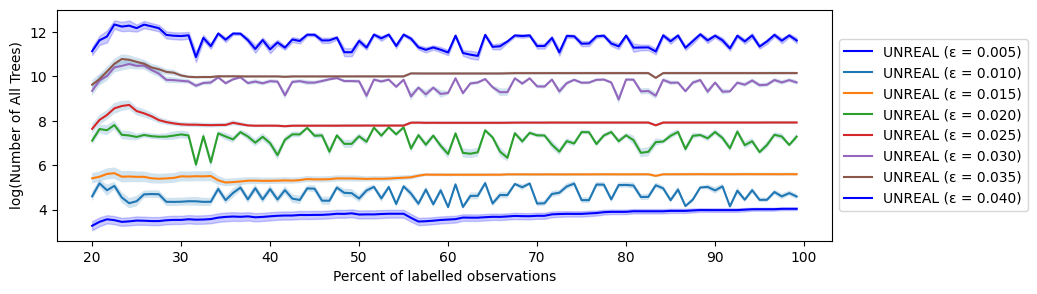

In [10]:
### Line Styles ###
linestyles = {
"UNREAL005" : "solid",
"UNREAL010" : "solid",
"UNREAL015" : "solid",
"UNREAL020" : "solid",
"UNREAL025" : "solid",
"UNREAL030" : "solid",
"UNREAL035" : "solid",
"UNREAL040" : "solid"
}
### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 UNREAL005 = np.log(AnalyzedData005["TreeCounts_ALL_UNREAL"]),
                 UNREAL010 = np.log(AnalyzedData010["TreeCounts_ALL_UNREAL"]),
                 UNREAL015 = np.log(AnalyzedData015["TreeCounts_ALL_UNREAL"]),
                 UNREAL020 = np.log(AnalyzedData020["TreeCounts_ALL_UNREAL"]),
                 UNREAL025 = np.log(AnalyzedData025["TreeCounts_ALL_UNREAL"]),
                 UNREAL030 = np.log(AnalyzedData030["TreeCounts_ALL_UNREAL"]),
                 UNREAL035 = np.log(AnalyzedData035["TreeCounts_ALL_UNREAL"]),
                 UNREAL040 = np.log(AnalyzedData040["TreeCounts_ALL_UNREAL"]),
                 Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "log(Number of All Trees)",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.2,
                 VarInput = False,
                 CriticalValue = 1.96)

# Number of Unique Trees

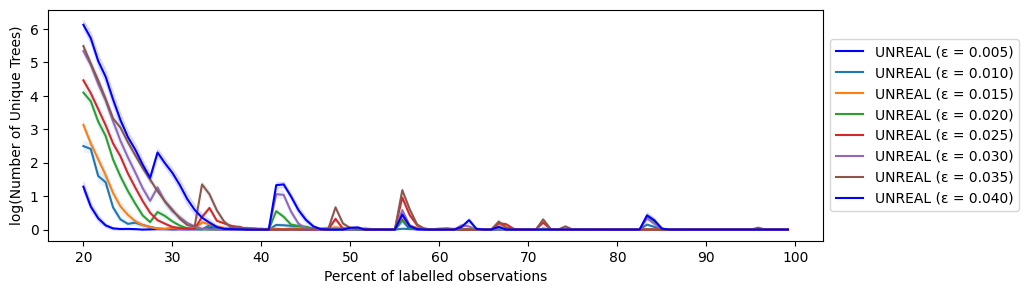

In [11]:
### Line Styles ###
linestyles = {"UNREAL005" : "solid",
"UNREAL010" : "solid",
"UNREAL015" : "solid",
"UNREAL020" : "solid",
"UNREAL025" : "solid",
"UNREAL030" : "solid",
"UNREAL035" : "solid",
"UNREAL040" : "solid"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 UNREAL005 =np.log(AnalyzedData005["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL010 = np.log(AnalyzedData010["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL015 =np.log(AnalyzedData015["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL020 = np.log(AnalyzedData020["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL025 =np.log(AnalyzedData025["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL030 = np.log(AnalyzedData030["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL035 =np.log(AnalyzedData035["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL040 = np.log(AnalyzedData040["TreeCounts_UNIQUE_UNREAL"]),
                 Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "log(Number of Unique Trees)",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.1,
                 VarInput = False,
                 CriticalValue = 1.96)